# Task 1.7 - Creating Network Visualizations

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

## 02. Importing Data

In [2]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_countries_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,3
...,...,...,...
74,Greece,Italy,2
75,Italy,Japan,6
76,Romania,Russia,6
77,India,Lebanon,2


## 03. Network Object

In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## 04. Static Network Graph with NetworkX

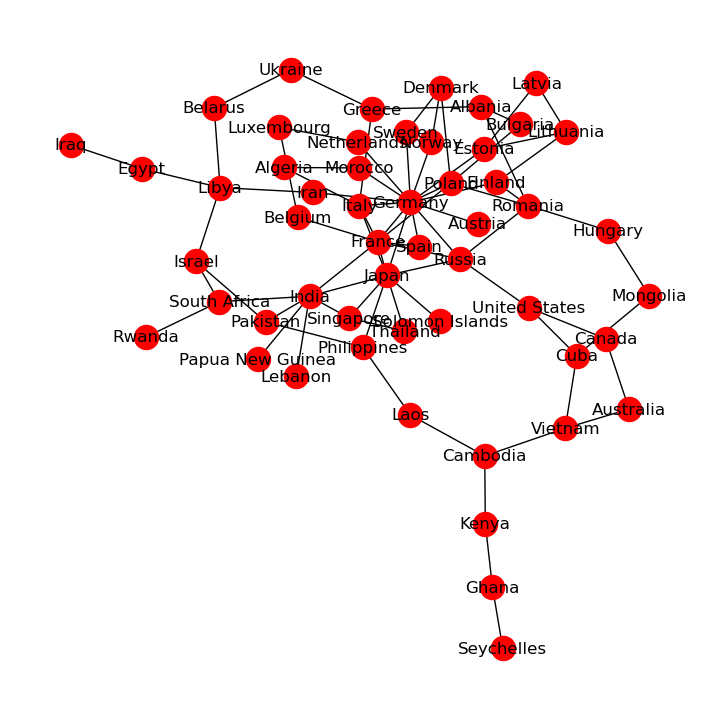

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_countries.png')

## 05. Interactive Network Graph with pyvis

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries_graph_pyvis.html")

countries_graph_pyvis.html


## 06. Leiden Algorithm to Detect Communities

In [8]:
# Importing additional libraries

import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans

1.7.2


In [9]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [10]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [11]:
new_com = coms.to_node_community_map()

In [12]:
new_com

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Italy': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Japan': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Papua New Guinea': [1],
             'Rwanda': [1],
             'Lebanon': [1],
             'Russia': [2],
             'Finland': [2],
             'Romania': [2],
             'Hungary': [2],
             'Mongolia': [2],
             'Cuba': [2],
             'United States': [2],

In [13]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [14]:
dict_com

{'France': 0,
 'Germany': 0,
 'Italy': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Papua New Guinea': 1,
 'Rwanda': 1,
 'Lebanon': 1,
 'Russia': 2,
 'Finland': 2,
 'Romania': 2,
 'Hungary': 2,
 'Mongolia': 2,
 'Cuba': 2,
 'United States': 2,
 'Canada': 2,
 'Australia': 2,
 'Vietnam': 2,
 'Albania': 3,
 'Greece': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'Bulgaria': 3,
 'Laos': 4,
 'Cambodia': 4,
 'Kenya': 4,
 'Ghana': 4,
 'Seychelles': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5}

## 07. Communities Algorithm in New Network Graph

In [15]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


### Observations: 
### It's easy to get lost in everything that happened within the 20th century and I won't go into every detail in my observations (it would be way, way too long). The red colors correlate to countries that dominated the beginning of the 20th century, with Pakistan, India, and Japan being major players. The blue colors represent countries that played major roles during the middle of the 20th century. Germany was at the center of the 20th century, so Germany would be the largest point with the thickest lines to Italy, Japan, Poland, France, Finland, and Austria. I actually thought the United States would be a larger point with a thicker line since the U.S. did contribute heavily in the 20th century and was surprised to find no line between Japan and the U.S. Perhaps this is due to the different ways the U.S. may be listed (e.g.: U.S., US, America, United States, the United States, etc.)? The article also may be listing countries only by their collective names, which wouldn't show up in the above chart: Allied Powers (U.S., U.K., Soviet Union) vs Axis Powers (Germany, Italy, Japan). The yellow colors are countries that came in at the end of the 20th century, which to me, seems a little off. 
### For the most part, the graph seems mostly accurate. But again, data is being pulled from a Wikipedia page which is not the most reliable source and is hugely condensed to fit into one article. The author will be biased on what they mostly want to highlight during this time. I also think the thickness of lines make sense and are largely accurate, but I'm not sure I necessarily agree with the beginning, middle, and end country dominance color scheme.

## 08. Degree, Closeness, and Betweenness Centrality Measures

#### Degree Centrality

In [16]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.15384615384615385,
 'Russia': 0.09615384615384616,
 'Germany': 0.2692307692307693,
 'Italy': 0.09615384615384616,
 'Austria': 0.019230769230769232,
 'Spain': 0.038461538461538464,
 'Poland': 0.09615384615384616,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.057692307692307696,
 'Denmark': 0.057692307692307696,
 'Norway': 0.038461538461538464,
 'Sweden': 0.038461538461538464,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Belgium': 0.038461538461538464,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Japan': 0.17307692307692307,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696,
 'Philippines': 0.057692307692

In [17]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [18]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

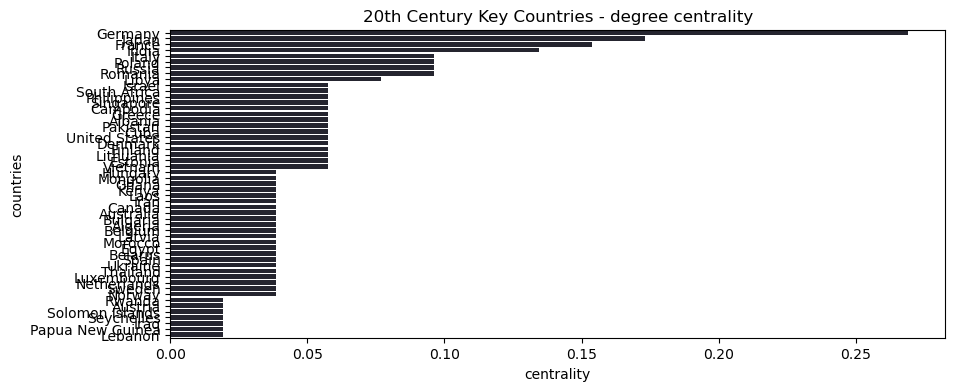

In [19]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Key Countries - degree centrality")

In [20]:
# Sort and filter to top 50 countries by centrality
top50_df = degree_df.sort_values("centrality", ascending=False).head(50)

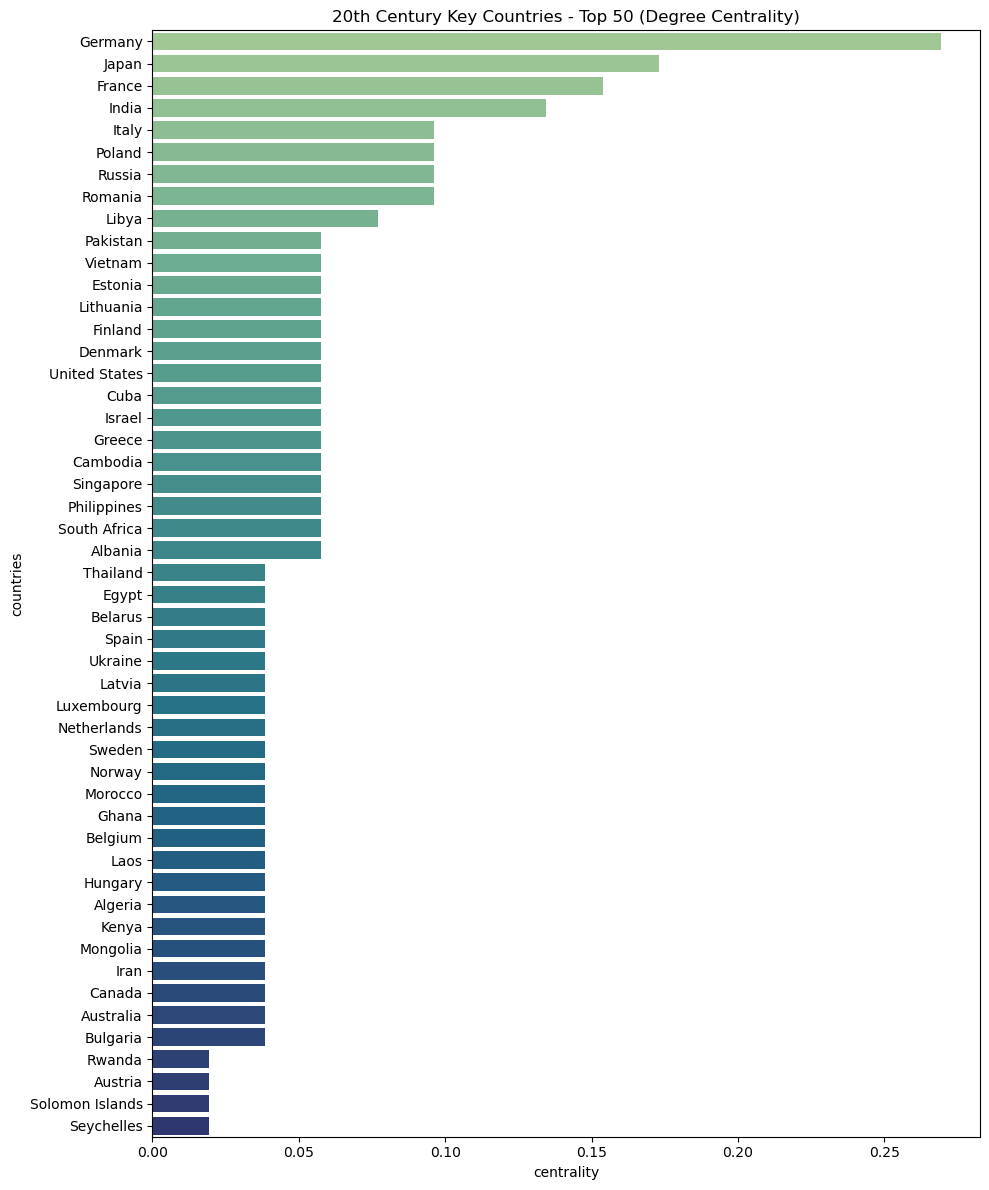

In [21]:
# New readable graph

plt.figure(figsize=(10, 12)) 
sns.barplot(
    x="centrality", 
    y="countries", 
    data=top50_df,
    palette=sns.color_palette("crest", n_colors=50),  # new palette
    saturation=0.9
).set_title("20th Century Key Countries - Top 50 (Degree Centrality)")
plt.tight_layout()
plt.show()

### Observations: 
### Germany is the top country, which makes sense, followed by Japan and France. I find it interesting that the top 4 countries have varying degrees of centrality, while the following countries (for the most part) fall within chunks. As noted earlier, it really depends on what the author of the article thought was/were the most important events throughout the 20th century and how often each country was physically mentioned. 

#### Closeness Centrality

In [22]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [23]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

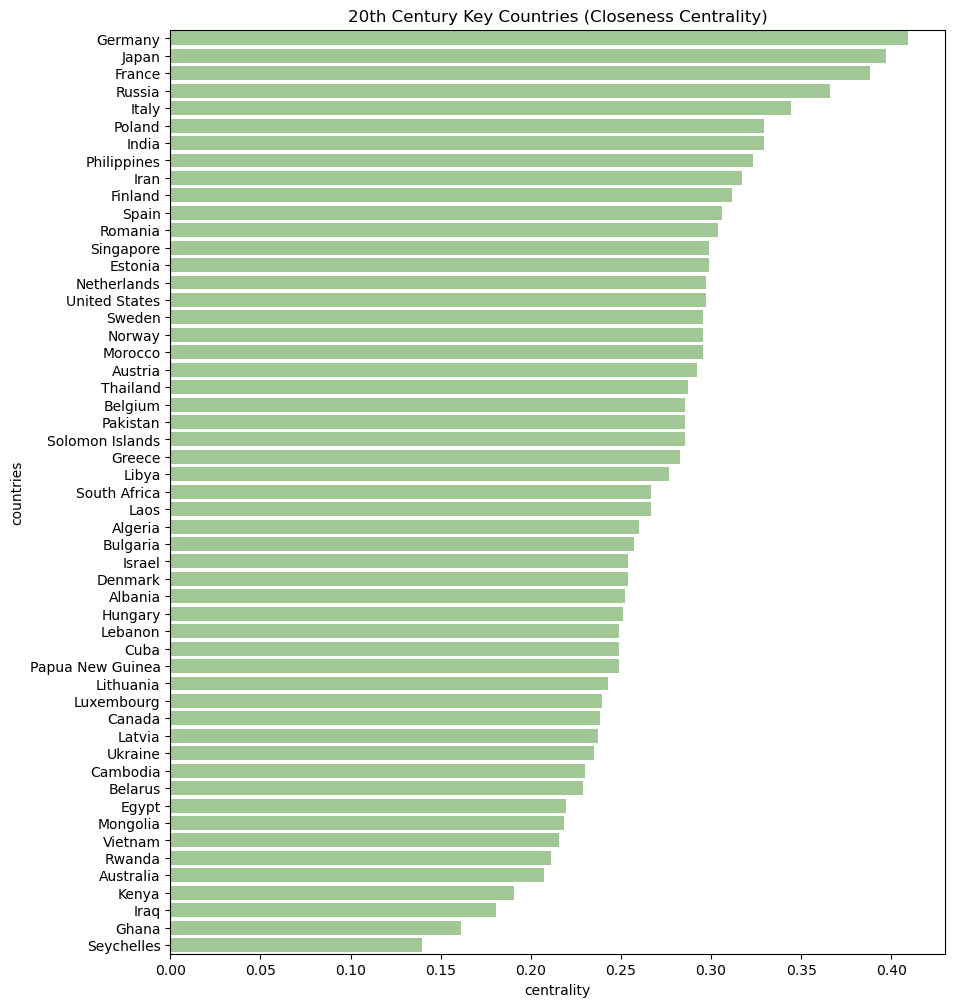

In [28]:
plt.figure(figsize = (10, 12))
with sns.color_palette("crest", n_colors=50):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Key Countries (Closeness Centrality)")

### Observations: 
### The closeness centrality is very close for all countries, meaning that all countries are closely connected, with (not surprisingly) Germany being the most influential country. The 20th century did have a lot of contention, which touched nearly every single country, so this closeness centrality is expected. 

#### Betweenness Centrality

In [29]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [30]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

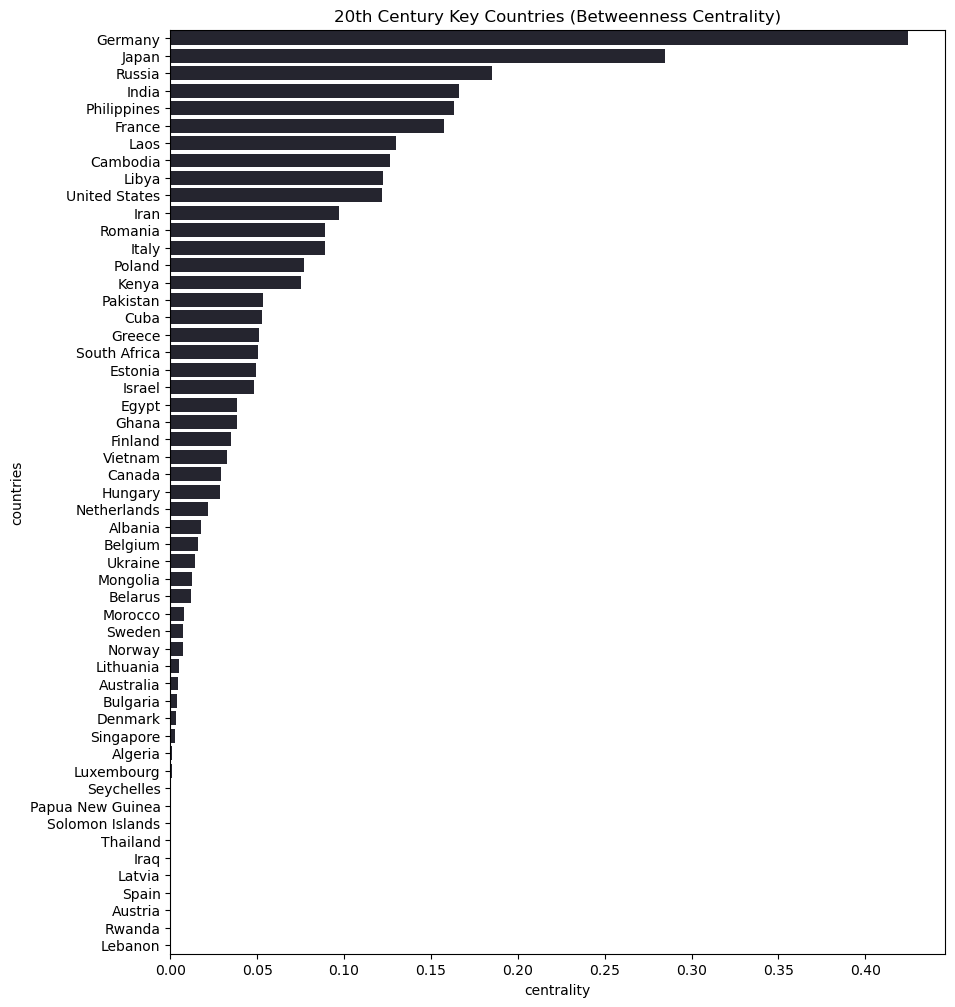

In [31]:
plt.figure(figsize = (10, 12))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Key Countries (Betweenness Centrality)")

### Observations: 
### The above betweenness output reconfirms what the closeness centrality score established - that Germany was the most "influential" country in the 20th century, followed by Japan. The other countries score lower, but still hold relatively high centrality which still makes them key countries in the 20th century. 